# Importaciones

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import mplfinance as mpf
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pickle  # Guardar modelo entrenado

# Lectura de datos

In [ ]:
df = pd.read_csv("nvda.csv")

df_train = df.drop('Date', axis= 1)

df_train.head()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000


# Visualización de datos

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


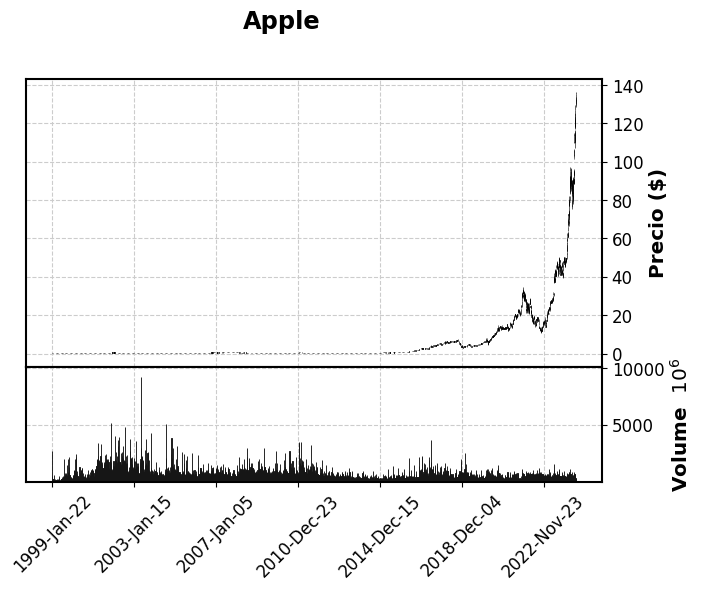

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df.set_index('Date', inplace=True)  # Set 'Date' column as the index

# Separamos dataframe por que tiene muchos datos y la libreria no soporta tantos datos
df_parte1 = df[:'2023-06-01']  # Ajusta la fecha según tu necesidad
df_parte2 = df['2018-06-01':]


mpf.plot(
    df,
    type='candle',
    title='Apple',
    ylabel='Precio ($)',
    style='classic',
    volume=True

)

# Separación de datos

In [ ]:
y = df_train['Adj Close']
x = df_train.drop('Adj Close', axis= 1)

In [ ]:
features = df_train[['Open', 'High', 'Low']]

# Codificación

In [ ]:
encoder = OneHotEncoder()
encoder.fit(features)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=42)


# Creación Modelo

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9999988920659469

In [ ]:
y_pred = lr.predict(x_test)

# Visualización Regresión Logística

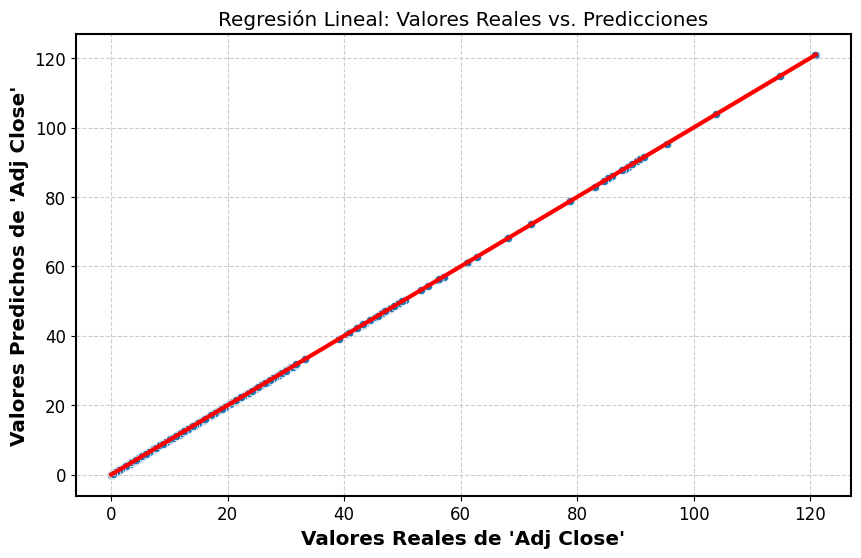

In [ ]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si lo necesitas

# Gráfica de dispersión de los valores reales vs. predicciones
sns.scatterplot(x=y_test, y=y_pred)

# Línea de regresión
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')

plt.xlabel("Valores Reales de 'Adj Close'")
plt.ylabel("Valores Predichos de 'Adj Close'")
plt.title("Regresión Lineal: Valores Reales vs. Predicciones")

plt.show()

# Guardar Modelo

In [ ]:
with open('nvda_model.pkl', 'wb') as archivo:   # Guardar modelo
    pickle.dump(lr, archivo)  # Nombre del modelo en este caso: 'lr'

# Análisis y Predicción del Precio de Acciones de NVIDIA

Este proyecto utiliza Python y bibliotecas de machine learning para analizar y predecir el precio de las acciones de NVIDIA (NVDA) mediante un modelo de regresión lineal.

## Características Principales
- 🚀 **Carga y preprocesamiento de datos** desde un archivo CSV.
- 📊 **Visualización de datos** usando `matplotlib` y `mplfinance`.
- 🏗️ **Ingeniería de Características** con `OneHotEncoder`.
- 🤖 **Entrenamiento de modelo de regresión lineal** con `scikit-learn`.
- 📈 **Evaluación del modelo** usando `mean_squared_error` y `r2_score`.
- 💾 **Guardado del modelo entrenado** con `pickle`.

## Requisitos
Asegúrese de tener instaladas las siguientes bibliotecas antes de ejecutar el script:

```bash
pip install pandas matplotlib seaborn mplfinance scikit-learn
```

## Uso
1. 📂 **Carga de datos:**
   - El script lee un archivo `nvda.csv` que contiene los precios de las acciones de NVIDIA.
   - La columna de fecha se convierte en `datetime` y se establece como índice.
2. 📉 **Visualización:**
   - Se generan gráficos de velas para analizar las tendencias del mercado.
3. 🎯 **Entrenamiento del modelo:**
   - Se separan las variables `Open`, `High`, `Low` y `Adj Close`.
   - Se codifican características categóricas y se divide el dataset en `train` y `test`.
   - Se entrena un modelo de regresión lineal.
4. 🔍 **Evaluación y Predicción:**
   - Se visualizan los resultados con `seaborn`.
   - Se guarda el modelo entrenado en `nvda_model.pkl`.

## Ejecución
Para ejecutar el script, simplemente ejecute:

```bash
python nvda_lr.py
```

## Autor
Este proyecto fue desarrollado en un entorno de Google Colab y posteriormente convertido en un script de Python para su ejecución local.

---
Cualquier mejora o retroalimentación es bienvenida.



In [1]:
!pip freeze > requirements.txt